In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import geopandas as gpd # GeoPandas library for spatial analytics
from shapely.geometry import shape
import folium

import folium

import plotly.graph_objects as go


from urllib.parse import urlencode
import urllib.request, json 

import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns # visualization styling package
%matplotlib inline 
import os 
from pandas.api.types import CategoricalDtype
import contextily as ctx
from shapely.geometry import Point

from shapely.geometry import LineString
from geopy import distance

In [2]:
bus_positions = pd.read_csv("./2023-05-17-bus-positions_1.csv")
bus_positions.head()

,timestamp,trip_id,route_id,trip_start_time,trip_start_date,vehicle_id,vehicle_label,vehicle_license_plate,latitude,longitude,...,stop_id,stop_status,occupancy_status,congestion_level,progress,block_assigned,dist_along_route,dist_from_stop,mid,stop_sequence
0,2023-05-17 06:21:30+00,KB_B3-Weekday-SDon-011000_BX9_602,BX9,NaN,2023-05-17,MTA NYCT_5335,NaN,NaN,40.852123,-73.882050,...,100642.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
1,2023-05-17 06:21:22+00,GH_B3-Weekday-SDon-012000_BX402_2,BX40,NaN,2023-05-17,MTA NYCT_5319,NaN,NaN,40.847942,-73.888466,...,102373.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
2,2023-05-17 06:21:36+00,EN_B3-Weekday-SDon-014000_B42_501,B42,NaN,2023-05-17,MTA NYCT_7905,NaN,NaN,40.637810,-73.894157,...,303351.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
3,2023-05-17 06:21:20+00,EN_B3-Weekday-SDon-014000_B82_601,B82,NaN,2023-05-17,MTA NYCT_7909,NaN,NaN,40.646675,-73.880371,...,304085.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
4,2023-05-17 06:21:26+00,EN_B3-Weekday-SDon-011700_B14_701,B14,NaN,2023-05-17,MTA NYCT_7923,NaN,NaN,40.673771,-73.861954,...,301555.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN


In [3]:
bus_positions_B41 = bus_positions[bus_positions["route_id"] == 'B41']
bus_positions_B41.shape

(162, 22)

In [4]:
bus_positions_B41.head()

,timestamp,trip_id,route_id,trip_start_time,trip_start_date,vehicle_id,vehicle_label,vehicle_license_plate,latitude,longitude,...,stop_id,stop_status,occupancy_status,congestion_level,progress,block_assigned,dist_along_route,dist_from_stop,mid,stop_sequence
6,2023-05-17 06:21:23+00,FB_B3-Weekday-SDon-012000_B41_202,B41,NaN,2023-05-17,MTA NYCT_7949,NaN,NaN,40.656109,-73.959984,...,303307.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
8,2023-05-17 06:21:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.609394,-73.921867,...,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
42,2023-05-17 06:21:01+00,FB_B3-Weekday-SDon-009500_B41_203,B41,NaN,2023-05-17,MTA NYCT_7836,NaN,NaN,40.695381,-73.990913,...,307403.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
150,2023-05-17 06:21:25+00,FB_B3-Weekday-SDon-012300_B41_204,B41,NaN,2023-05-17,MTA NYCT_7648,NaN,NaN,40.646713,-73.958115,...,303239.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
264,2023-05-17 06:23:53+00,FB_B3-Weekday-SDon-012000_B41_202,B41,NaN,2023-05-17,MTA NYCT_7949,NaN,NaN,40.654922,-73.959717,...,303308.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844852,NaN


In [5]:
trips = bus_positions_B41['trip_id'].drop_duplicates().reset_index().drop('index',axis = 1)
trips


,trip_id
0,FB_B3-Weekday-SDon-012000_B41_202
1,FB_B3-Weekday-SDon-015500_B41_201
2,FB_B3-Weekday-SDon-009500_B41_203
3,FB_B3-Weekday-SDon-012300_B41_204
4,FB_B3-Weekday-SDon-015000_B41_203
5,FB_B3-Weekday-SDon-018300_B41_202
6,FB_B3-Weekday-SDon-018000_B41_204
7,FB_B3-Weekday-SDon-021000_B41_201
8,FB_B3-Weekday-SDon-042500_B41_213
9,FB_B3-Weekday-SDon-039700_B41_223


In [6]:
test_trip = bus_positions[bus_positions['trip_id'] == "FB_B3-Weekday-SDon-015500_B41_201"].reset_index().drop('index',axis = 1)
test_trip.head()

,timestamp,trip_id,route_id,trip_start_time,trip_start_date,vehicle_id,vehicle_label,vehicle_license_plate,latitude,longitude,...,stop_id,stop_status,occupancy_status,congestion_level,progress,block_assigned,dist_along_route,dist_from_stop,mid,stop_sequence
0,2023-05-17 06:21:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.609394,-73.921867,...,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN
1,2023-05-17 06:23:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.610043,-73.922607,...,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844852,NaN
2,2023-05-17 06:25:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.610077,-73.922646,...,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844854,NaN
3,2023-05-17 06:27:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.609497,-73.921989,...,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844857,NaN
4,2023-05-17 06:29:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.609600,-73.922104,...,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844859,NaN


In [7]:
geometry = [Point(xy) for xy in zip(test_trip['longitude'], test_trip['latitude'])]
gdf = gpd.GeoDataFrame(test_trip, geometry=geometry)

# Optional: Set the coordinate reference system (CRS) of the GeoDataFrame
gdf.crs = 'EPSG:4326'  # Assuming WGS84 coordinate system (latitude/longitude)

# Now you have a GeoDataFrame with geometry column containing Point objects
print(gdf.head())

                timestamp                            trip_id route_id  \
0  2023-05-17 06:21:31+00  FB_B3-Weekday-SDon-015500_B41_201      B41   
1  2023-05-17 06:23:31+00  FB_B3-Weekday-SDon-015500_B41_201      B41   
2  2023-05-17 06:25:31+00  FB_B3-Weekday-SDon-015500_B41_201      B41   
3  2023-05-17 06:27:31+00  FB_B3-Weekday-SDon-015500_B41_201      B41   
4  2023-05-17 06:29:31+00  FB_B3-Weekday-SDon-015500_B41_201      B41   

   trip_start_time trip_start_date     vehicle_id  vehicle_label  \
0              NaN      2023-05-17  MTA NYCT_7936            NaN   
1              NaN      2023-05-17  MTA NYCT_7936            NaN   
2              NaN      2023-05-17  MTA NYCT_7936            NaN   
3              NaN      2023-05-17  MTA NYCT_7936            NaN   
4              NaN      2023-05-17  MTA NYCT_7936            NaN   

   vehicle_license_plate   latitude  longitude  ...    stop_status  \
0                    NaN  40.609394 -73.921867  ...  IN_TRANSIT_TO   
1           

<AxesSubplot:>

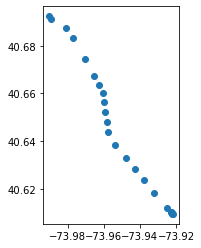

In [8]:
gdf.plot()

In [9]:
map_center = gdf['geometry'].unary_union.centroid
m = folium.Map(location=[map_center.y, map_center.x], zoom_start=12)

# Add GeoDataFrame to the map as markers
for idx, row in gdf.iterrows():
    folium.Marker(
        location=[row['geometry'].y, row['geometry'].x],
        popup=row['stop_id'],  # Assuming you have an 'address' column in the GeoDataFrame
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map
m

In [10]:
sorted_gdf = gdf.sort_values(by='timestamp', ascending=True)
pd.set_option('display.max_columns', None)

sorted_gdf.head()


,timestamp,trip_id,route_id,trip_start_time,trip_start_date,vehicle_id,vehicle_label,vehicle_license_plate,latitude,longitude,bearing,speed,stop_id,stop_status,occupancy_status,congestion_level,progress,block_assigned,dist_along_route,dist_from_stop,mid,stop_sequence,geometry
0,2023-05-17 06:21:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.609394,-73.921867,138.37,NaN,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844850,NaN,POINT (-73.92187 40.60939)
1,2023-05-17 06:23:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.610043,-73.922607,139.13,NaN,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844852,NaN,POINT (-73.92261 40.61004)
2,2023-05-17 06:25:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.610077,-73.922646,139.13,NaN,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844854,NaN,POINT (-73.92265 40.61008)
3,2023-05-17 06:27:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.609497,-73.921989,138.37,NaN,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844857,NaN,POINT (-73.92199 40.60950)
4,2023-05-17 06:29:31+00,FB_B3-Weekday-SDon-015500_B41_201,B41,NaN,2023-05-17,MTA NYCT_7936,NaN,NaN,40.609600,-73.922104,138.37,NaN,300163.0,IN_TRANSIT_TO,EMPTY,UNKNOWN_CONGESTION_LEVEL,NaN,NaN,NaN,NaN,1844859,NaN,POINT (-73.92210 40.60960)


In [11]:
print(sorted_gdf['timestamp'].iloc[0])
print(sorted_gdf['timestamp'].iloc[len(sorted_gdf) - 1])


2023-05-17 06:21:31+00
2023-05-17 07:09:23+00


In [12]:
# Convert 'timestamp' column to datetime format
sorted_gdf['timestamp'] = pd.to_datetime(sorted_gdf['timestamp'])

points_series = gdf['geometry']
line = LineString(points_series)

# Calculate the time difference between the first and last timestamps
time_difference = sorted_gdf['timestamp'].iloc[-1] - sorted_gdf['timestamp'].iloc[0]
time_difference


Timedelta('0 days 00:47:52')

In [13]:


# Assuming you have a LineString named "line"
line_coords = list(line.coords)

# Set the CRS for the LineString
crs = 'EPSG:4326'  # Assuming WGS84 coordinates
line_crs = LineString(line_coords)
line_crs = gpd.GeoSeries([line_crs], crs=crs)

# Create a folium map centered at a specific location
map_center = [line_coords[0][1], line_coords[0][0]]
m = folium.Map(location=map_center, zoom_start=12)

# Add the GeoSeries to the map as a GeoJSON layer
folium.GeoJson(line_crs).add_to(m)

# Display the map
m


In [14]:
line_crs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:

# Assuming you have a GeoDataFrame named "gdf" with points or LineString geometry

# Convert CRS to a suitable projection for distance calculations (e.g., UTM)
line_utm = line_crs.to_crs('EPSG:32610')

# Calculate the length of LineString in meters
length_meters = line_utm.length.iloc[0]

# Convert length from meters to miles
length_miles = distance.distance(meters=length_meters).miles

print(length_miles)


9.003493439190217


In [16]:
# Calculate the average speed
avg_speed = length_miles / time_difference.total_seconds() * 3600
avg_speed

11.285716010127013

In [17]:
stops = gpd.read_file("./Bus_Data/Bus_Shapefiles (3)/NYC_2015_GTFS_Bus_Stops.shp")

In [18]:
stops.head()

,stop_lat,stop_lon,stop_id,stop_name,geometry
0,40.872562,-73.888153,100014.0,BEDFORD PK BL/GRAND CONCOURSE,POINT (-73.88815 40.87256)
1,40.876808,-73.889656,100017.0,PAUL AV/W 205 ST,POINT (-73.88966 40.87681)
2,40.880341,-73.886063,100018.0,PAUL AV/W MOSHOLU PY S,POINT (-73.88606 40.88034)
3,40.813496,-73.929489,100019.0,GRAND CONCOURSE/E 138 ST,POINT (-73.92949 40.81350)
4,40.816803,-73.927956,100020.0,GRAND CONCOURSE/E 144 ST,POINT (-73.92796 40.81680)


In [45]:
stops = stops.to_crs('EPSG:4326')


In [48]:
line_crs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [46]:
# Add stops as markers to the map
flatbush = stops[stops['stop_name'] == 'FLATBUSH AV/PARK PL']
map = folium.Map(location=[flatbush.geometry.centroid.y.mean(), flatbush.geometry.centroid.x.mean()], zoom_start=12)
for _, stop in flatbush.iterrows():
    folium.Marker(
        location=[stop.geometry.y, stop.geometry.x],
        popup=stop['stop_name'],
        icon=folium.Icon(icon='bus', prefix='fa')
    ).add_to(map)
    
folium.GeoJson(line_crs).add_to(map)


# Display the map
map


In [50]:
# Create the buffer around the point
buffer_distance = 100  # Buffer distance in the units of CRS
target_crs = "EPSG:2263"  # New York State Plane Coordinate System, which uses feet

# Project the GeoDataFrame to the target CRS
flatbush_ft = flatbush.to_crs(target_crs)
buffer_gdf = flatbush_ft.buffer(buffer_distance)
#buffer_gdf

buffer_gdf = buffer_gdf.to_crs("EPSG:4326")

#buffer_geojson = buffer_gdf.__geo_interface__

# Add stops as markers to the map
map = folium.Map(location=[flatbush.geometry.centroid.y.mean(), flatbush.geometry.centroid.x.mean()], zoom_start=12)
for _, stop in flatbush.iterrows():
    folium.Marker(
        location=[stop.geometry.y, stop.geometry.x],
        popup=stop['stop_name'],
        icon=folium.Icon(icon='bus', prefix='fa')
    ).add_to(map)
    
folium.GeoJson(line_crs).add_to(map)
folium.GeoJson(buffer_gdf).add_to(map)


# Display the map
map




In [35]:
flatbush.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich